In [1]:
# Importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the table above, we can note a few things. 
First of all, we need to convert a lot of features into numeric ones,
Many features have widely different ranges, we will need to convert them into roughly the same scale.
We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

# Exploratory Data Analysis (EDA)

In [3]:
# Check the dataset shape
df.shape

(891, 12)

In [4]:
# knowing the datatypes of the dataset 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Data column description

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [5]:
# knowing the datatypes of the dataset 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Let’s take a more detailed look at the missing data:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data[missing_data['Total']>0]

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


The Embarked feature variable has only 2 missing values, which we can deal with
the ‘Age’ feature variable has 177 missing values. 
The ‘Cabin’ feature variable can be dropped from our dataset as almost 78% of it is missing.

In [7]:
df.drop(columns=["Cabin"],inplace=True)

Also, the PassengerId, Name and Ticket variables can be dropped as well as they cannot be correlated with our target variable 

In [8]:
df.drop(columns=["PassengerId"],inplace=True)
df.drop(columns=["Name"],inplace=True)
df.drop(columns=["Ticket"],inplace=True)

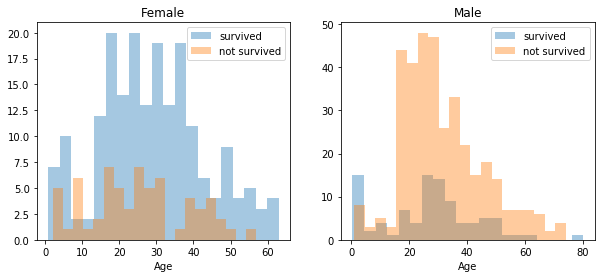

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

As we can see, the survival rate is high for females as compared to males

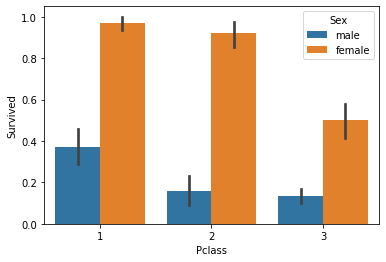

In [10]:
sns.barplot(x='Pclass', y='Survived', hue = 'Sex' ,data=df)
plt.show()

Here, we can note that Pclass is contributing to a persons chance of survival, especially if this person is in class 1

In [11]:
# Filling missing values
mode = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(mode)

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
# Treating other Variables
df['Fare'] = df['Fare'].fillna(0)
df['Fare'] = df['Fare'].astype(int)

genders = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(genders)

#ports = {"S": 0, "C": 1, "Q": 2}
#df['Embarked'] = df['Embarked'].map(ports)
#df['Embarked'] = df['Embarked'].astype(int)
df.drop(columns=["Embarked"],inplace=True)

Using Label encoder to encode the categories of Embarked into numeric form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked'] =le.fit_transform(df['Embarked'])

In [14]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,31.785634
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.703730
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
dtypes: float64(1), int32(1), int64(5)
memory usage: 45.4 KB


In [16]:
# Identifying the dependent and the independent variables
X=df.drop(columns=["Survived"])
y = df[["Survived"]]

In [17]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7
1,1,1,38.0,1,0,71
2,3,1,26.0,0,0,7
3,1,1,35.0,1,0,53
4,3,0,35.0,0,0,8


In [18]:
print(X.shape)
print(y.shape)

(891, 6)
(891, 1)


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=97)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(596, 6)
(596, 1)
(295, 6)
(295, 1)


In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_curve,auc

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_curve,auc

In [23]:
KNN=KNeighborsClassifier()
SVC=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=8)
GNB=GaussianNB()

In [24]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SVC))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

In [25]:
Model = []
F1_score=[]
Accuracy_score=[]
Precision_score=[]
CVS = []
rocscore = []
for name, model in models:
    Model.append(name)
    ml=model
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    F1_score.append(f1_score(y_test,pred))
    Accuracy_score.append(accuracy_score(y_test,pred)*100)
    Precision_score.append(precision_score(y_test,pred)*100)
    sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    CVS.append(sc*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    rocscore.append(roc_auc*100)
    

In [26]:
resultset=pd.DataFrame({'Model':Model,
                        'F1_score':F1_score,
                        'Accuracy_score': Accuracy_score, 
                        'Precision Score': Precision_score,
                        'Cross_Val_Score': CVS,
                        'ROC_Score':rocscore
                       })
resultset

,Model,F1_score,Accuracy_score,Precision Score,Cross_Val_Score,ROC_Score
0,KNeighborsClassifier,0.563380,68.474576,58.252427,71.402650,65.651106
1,SVC,0.478723,66.779661,57.692308,69.944444,61.535627
2,LogisticRegression,0.690000,78.983051,76.666667,79.351578,75.687961
3,DecisionTreeClassifier,0.640394,75.254237,69.892473,80.034559,71.977887
4,GaussianNB,0.669903,76.949153,71.875000,78.795994,74.066339


As we see from the table, Logistic Regression model performs better compared to others. Finalizing the model on Logistic regression

In [27]:
# Serialization of the model
import joblib
joblib.dump(LR,'titanic_suvival.obj')

['titanic_suvival.obj']

In [28]:
model=joblib.load('titanic_suvival.obj')

In [29]:
model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)